# 🤗 Datasets

## Preprocess

Please see the [Preprocess tutorial](https://huggingface.co/docs/datasets/use_dataset#preprocess) for 🤗 Datasets.

##### In a nutshell...

> There are many possible ways to preprocess a dataset, and it all depends on your specific dataset. Sometimes you may need to rename a column, and other times you might need to unflatten nested fields. 🤗 Datasets provides a way to do most of these things. But in nearly all preprocessing cases, depending on your dataset modality, you’ll need to:
> * Tokenize a text dataset.
> * Resample an audio dataset.
> * Apply transforms to an image dataset.

In [1]:
import json

from transformers import AutoTokenizer
from datasets import load_dataset

In [2]:
from datasets import load_dataset

dataset = load_dataset("cornell-movie-review-data/rotten_tomatoes", split="train")
type(dataset)

datasets.arrow_dataset.Dataset

#### Tokenize text

In [3]:
print(json.dumps(dataset[0], indent=2))
#dataset[0]

{
  "text": "the rock is destined to be the 21st century's new \" conan \" and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .",
  "label": 1
}


In [4]:
print(json.dumps(dataset[-1], indent=2))
#dataset[-1]

{
  "text": "things really get weird , though not particularly scary : the movie is all portent and no content .",
  "label": 0
}


In [5]:
dataset.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

> But it is important to remember that indexing order matters, especially when working with large audio and image datasets. Indexing by the column name returns all the values in the column first, then loads the value at that position. <span style="background-color:#33FFFF">For large datasets, it may be slower to index by the column name first.</span>

#### Slicing

In [6]:
print(json.dumps(dataset[:3], indent=2))
#dataset[:3]

{
  "text": [
    "the rock is destined to be the 21st century's new \" conan \" and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .",
    "the gorgeously elaborate continuation of \" the lord of the rings \" trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth .",
    "effective but too-tepid biopic"
  ],
  "label": [
    1,
    1,
    1
  ]
}


In [7]:
print(json.dumps(dataset[3:6], indent=2))
#dataset[3:6]

{
  "text": [
    "if you sometimes like to go to the movies to have fun , wasabi is a good place to start .",
    "emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .",
    "the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game ."
  ],
  "label": [
    1,
    1,
    1
  ]
}


#### Tokenize text

In [8]:
from transformers import AutoTokenizer
from datasets import load_dataset

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

dataset = load_dataset("cornell-movie-review-data/rotten_tomatoes", split="train")
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})

In [9]:
tokenizer(dataset[0]["text"])

{'input_ids': [101, 1996, 2600, 2003, 16036, 2000, 2022, 1996, 7398, 2301, 1005, 1055, 2047, 1000, 16608, 1000, 1998, 2008, 2002, 1005, 1055, 2183, 2000, 2191, 1037, 17624, 2130, 3618, 2084, 7779, 29058, 8625, 13327, 1010, 3744, 1011, 18856, 19513, 3158, 5477, 4168, 2030, 7112, 16562, 2140, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
def tokenization(example):
    return tokenizer(example["text"])

dataset = dataset.map(tokenization, batched=True)
dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 8530
})

#### Resample audio signals

> 1. Start by loading the MInDS-14 dataset, the Audio feature, and the feature extractor corresponding to a pretrained Wav2Vec2 model

In [11]:
from transformers import AutoFeatureExtractor
from datasets import load_dataset, Audio

feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base-960h")

dataset = load_dataset("PolyAI/minds14", "en-US", split="train")
dataset

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 563
})

In [12]:
print(dataset.info.description)

MINDS-14 is a dataset for the intent detection task with spoken data. It covers 14 intents extracted from a commercial system in the e-banking domain, associated with spoken examples in 14 diverse language varieties.


In [13]:
dataset.info.features

{'path': Value(dtype='string', id=None),
 'audio': Audio(sampling_rate=8000, mono=True, decode=True, id=None),
 'transcription': Value(dtype='string', id=None),
 'english_transcription': Value(dtype='string', id=None),
 'intent_class': ClassLabel(names=['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill'], id=None),
 'lang_id': ClassLabel(names=['cs-CZ', 'de-DE', 'en-AU', 'en-GB', 'en-US', 'es-ES', 'fr-FR', 'it-IT', 'ko-KR', 'nl-NL', 'pl-PL', 'pt-PT', 'ru-RU', 'zh-CN'], id=None)}

> 2. Index into the first row of the dataset. When you call the audio column of the dataset, it is automatically decoded and resampled

This requires `librosa`.

In [14]:
dataset[0]["audio"]

{'path': '/home/so_olliphant/.cache/huggingface/datasets/downloads/extracted/f07fcdddb7d9029b5c67c294edfee7c5dbe95a54c91612ea5e433e3b584680fa/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ]),
 'sampling_rate': 8000}

#### NOTE!

With `cast_column`, the sampling rate value of the dataset is properly updated to 16 kHz.

When using `map` with the `preprocess` function, the `sampling_rate` value for the example row _does NOT change!!!_

In [15]:
dataset = load_dataset("PolyAI/minds14", "en-US", split="train")
dataset

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 563
})

In [16]:
dataset[0]["audio"]

{'path': '/home/so_olliphant/.cache/huggingface/datasets/downloads/extracted/f07fcdddb7d9029b5c67c294edfee7c5dbe95a54c91612ea5e433e3b584680fa/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ]),
 'sampling_rate': 8000}

In [17]:
%%time

dataset = dataset.cast_column("audio", Audio(sampling_rate=16_000))
dataset

CPU times: user 1.02 ms, sys: 3.71 ms, total: 4.73 ms
Wall time: 3.36 ms


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 563
})

In [18]:
dataset[0]["audio"]

{'path': '/home/so_olliphant/.cache/huggingface/datasets/downloads/extracted/f07fcdddb7d9029b5c67c294edfee7c5dbe95a54c91612ea5e433e3b584680fa/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 1.70562416e-05,  2.18727451e-04,  2.28099874e-04, ...,
         3.43842403e-05, -5.96364771e-06, -1.76846661e-05]),
 'sampling_rate': 16000}

<hr width=40%/>

In [19]:
dataset = load_dataset("PolyAI/minds14", "en-US", split="train")
dataset

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 563
})

In [20]:
dataset[0]["audio"]

{'path': '/home/so_olliphant/.cache/huggingface/datasets/downloads/extracted/f07fcdddb7d9029b5c67c294edfee7c5dbe95a54c91612ea5e433e3b584680fa/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ]),
 'sampling_rate': 8000}

In [21]:
%%time

def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays, sampling_rate=feature_extractor.sampling_rate, max_length=16000, truncation=True
    )
    return inputs

dataset = dataset.map(preprocess_function, batched=True)
dataset

CPU times: user 5.6 ms, sys: 171 µs, total: 5.77 ms
Wall time: 4.32 ms


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id', 'input_values'],
    num_rows: 563
})

In [22]:
dataset[0]["audio"]

{'path': None,
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ]),
 'sampling_rate': 8000}

----

#### Apply data augmentations

In [23]:
from transformers import AutoFeatureExtractor
from datasets import load_dataset, Image

feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")

dataset = load_dataset("AI-Lab-Makerere/beans", split="train")
dataset

/opt/conda/envs/learn-hf/lib/python3.9/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Dataset({
    features: ['image_file_path', 'image', 'labels'],
    num_rows: 1034
})

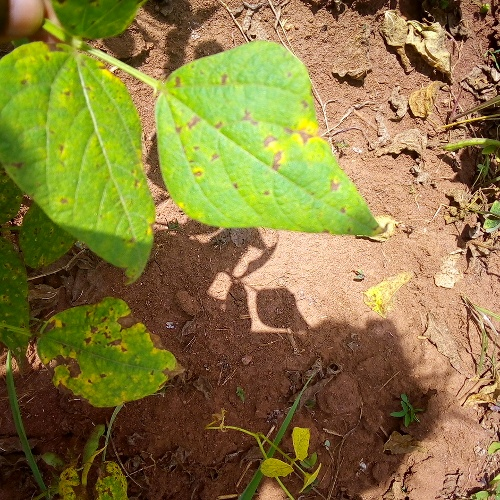

In [24]:
dataset[0]["image"]

In [25]:
dataset = dataset.cast_column("image", Image(mode="RGB"))
dataset

Dataset({
    features: ['image_file_path', 'image', 'labels'],
    num_rows: 1034
})

In [26]:
from torchvision.transforms import RandomRotation

rotate = RandomRotation(degrees=(0, 90))
def transforms(examples):
    examples["pixel_values"] = [rotate(image) for image in examples["image"]]
    return examples

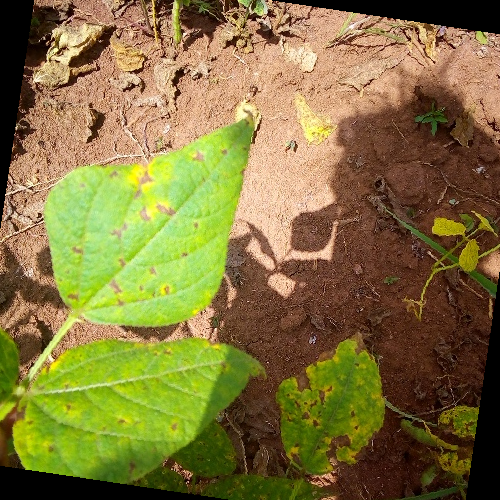

In [27]:
dataset.set_transform(transforms)
dataset[0]["pixel_values"]